In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/dataset_1000_minimum_reviews.csv', index_col='Unnamed: 0')
data

,user_id,movie_id,rating,genre,gender,age,occupation,time,binary_rating
0,3669,1197,4,Action|Adventure|Comedy|Romance,M,25,14,0,0
1,3621,780,2,Action|Sci-Fi|War,M,18,4,1,0
2,4917,1234,3,Comedy|Crime,M,45,0,2,0
3,1147,1544,2,Action|Adventure|Sci-Fi|Thriller,M,25,20,3,0
4,262,3175,5,Adventure|Comedy|Sci-Fi,F,25,1,4,1
...,...,...,...,...,...,...,...,...,...
284267,2240,1544,5,Action|Adventure|Sci-Fi|Thriller,M,45,12,284267,1
284268,5550,1089,4,Crime|Thriller,M,35,15,284268,0
284269,5988,1197,4,Action|Adventure|Comedy|Romance,M,25,15,284269,0
284270,3764,923,5,Drama,M,25,1,284270,1


### User features Data

In [11]:
data

,user_id,movie_id,rating,genre,gender,age,occupation,time,binary_rating
0,3669,1197,4,Action|Adventure|Comedy|Romance,M,25,14,0,0
1,3621,780,2,Action|Sci-Fi|War,M,18,4,1,0
2,4917,1234,3,Comedy|Crime,M,45,0,2,0
3,1147,1544,2,Action|Adventure|Sci-Fi|Thriller,M,25,20,3,0
4,262,3175,5,Adventure|Comedy|Sci-Fi,F,25,1,4,1
...,...,...,...,...,...,...,...,...,...
284267,2240,1544,5,Action|Adventure|Sci-Fi|Thriller,M,45,12,284267,1
284268,5550,1089,4,Crime|Thriller,M,35,15,284268,0
284269,5988,1197,4,Action|Adventure|Comedy|Romance,M,25,15,284269,0
284270,3764,923,5,Drama,M,25,1,284270,1


In [16]:
user_features = data[['user_id', 'gender', 'age', 'occupation']]

dummies_occup = pd.get_dummies(user_features['occupation'])
dummies_occup = dummies_occup.astype(int)

occupations_columns = [f'occup_{i}' for i in range(21)]
dummies_occup.columns = occupations_columns

dummies_genre = pd.get_dummies(user_features['gender'])
dummies_genre = dummies_genre.astype(int)

user_features = pd.concat([user_features.drop(['gender','occupation'], axis = 1),
                           dummies_genre, dummies_occup, ], axis=1)


In [17]:
# We first get the columns necessary to compute our vector x of the data of users
user_features = data[['time', 'movie_id', 'user_id', 'binary_rating', 'gender', 'age', 'occupation']]

# We create a dataframe where the different occupations are the columns and each row is a user
# In this dataframe, a cell returns the bool True if an user as the occupation_i and False else
dummies_occup = pd.get_dummies(user_features['occupation'])
# We replace the bools by 1s and 0s
dummies_occup = dummies_occup.astype(int)

# Same for the genders
occupations_columns = [f'occup_{i}' for i in range(21)]
dummies_occup.columns = occupations_columns

dummies_genre = pd.get_dummies(user_features['gender'])
dummies_genre = dummies_genre.astype(int)

# We drop the previous columns genders and occupation and concat our new dataframe
user_features = pd.concat([user_features.drop(['gender','occupation'], axis = 1),
                           dummies_genre, dummies_occup, ], axis=1)

# We center and reduce 'age'
user_features['age'] = (user_features['age']- user_features['age'].mean()) / user_features['age']

# Here we can indeed see that new columns were defined for the 'gender_F' and 'gender_M' as well as the 20 occupations
user_features.head() # That's the collection of our 'x' vectors for all 'time'

,time,movie_id,user_id,binary_rating,age,F,M,occup_0,occup_1,occup_2,...,occup_11,occup_12,occup_13,occup_14,occup_15,occup_16,occup_17,occup_18,occup_19,occup_20
0,0,1197,3669,0,-0.208675,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,780,3621,0,-0.678715,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1234,4917,0,0.328514,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1544,1147,0,-0.208675,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,3175,262,1,-0.208675,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Stream of Data

In [ ]:
class MAB(ABC):
    """Base class for a contextual multi-armed bandit (MAB)
    
    Parameters
    ----------
    n_arms : int
        Number of arms.
    """
    # initialise and raise input errors
    def __init__(self, n_arms):
        if not type(n_arms)==int:
            raise TypeError("`n_arms` must be an integer")
        if not n_arms >= 0:
            raise ValueError("`n_arms` must be non-negative")
        self.n_arms = n_arms
        
    @abstractmethod
    # raise input errors
    def play(self, context):
        """Play a round
        
        Parameters
        ----------        
        context : float numpy.ndarray, shape (n_arms, n_dims), optional
            An array of context vectors presented to the MAB. The 0-th 
            axis indexes the arms, and the 1-st axis indexes the features.
            Non-contextual bandits accept a context of None.
        
        Returns
        -------
        arm : int
            Integer index of the arm played this round. Should be in the set 
            {0, ..., n_arms - 1}.
        """
        if not type(context) == np.ndarray:
            raise TypeError("`context` must be numpy.ndarray")
        if not context.shape == (n_arms, n_dims):
            raise TypeError("`context` must have shape (n_arms, n_dims)")
        self.context = context

    
    @abstractmethod
    # raise input errors
    def update(self, arm, reward, context):
        """Update the internal state of the MAB after a play
        
        Parameters
        ----------
        arm : int
            Integer index of the played arm in the set {0, ..., n_arms - 1}.
        
        reward : float
            Reward received from the arm.
        
        context : float numpy.ndarray, shape (n_arms, n_dims), optional
            An array of context vectors that was presented to the MAB. The 
            0-th axis indexes the arms, and the 1-st axis indexes the 
            features. Non-contextual bandits accept a context of None. 
        """
        if not (type(arm) == int or arm.dtype == 'int64'):
            raise TypeError("`arm` must be int type")
        if not (arm >= 0 and arm <= (n_arms-1)):
            raise ValueError("`arm` must be the the set {0, .., n_arms - 1}")
        if not (type(reward) == float or reward.dtype == 'float64'):
            raise TypeError("`reward` must be float type")
        if not (context.shape == (n_arms, n_dims) and context.dtype == 'float64') :
            raise TypeError("`context` must be float numpy in shape (n_events, n_arms, n_dims)")
        # get the values
        self.arm = arm
        self.reward = reward
        self.context = context

In [ ]:
def offlineEvaluate(mab, arms, rewards, contexts, n_rounds=None):
    """Offline evaluation of a multi-armed bandit
    
    Parameters
    ----------
    mab : instance of MAB
        MAB to evaluate.
    
    arms : integer numpy.ndarray, shape (n_events,) 
        Array containing the history of pulled arms, represented as integer 
        indices in the set {0, ..., mab.n_arms}
    
    rewards : float numpy.ndarray, shape (n_events,)
        Array containing the history of rewards.
    
    contexts : float numpy.ndarray, shape (n_events, n_arms, n_dims)
        Array containing the history of contexts presented to the arms. 
        The 0-th axis indexes the events in the history, the 1-st axis 
        indexes the arms and the 2-nd axis indexed the features.
        
    n_rounds : int, default=None
        Number of matching events to evaluate the MAB on. If None, 
        continue evaluating until the historical events are exhausted.
    
    Returns
    -------
    out : float numpy.ndarray
        Rewards for the matching events.
    """
    # initialise values and raise input errors
    if not (arms.shape == (n_events,) and arms.dtype == 'int64')  :
        raise TypeError("`arms` must be integer numpy in shape (n_events,)")
    if not rewards.shape == (n_events,) and rewards.dtype == 'float64' :
        raise TypeError("`rewards` must be float numpy in shape (n_events,)")
    if not contexts.shape == (n_events,n_arms, n_dims) and rewards.dtype == 'float64' :
        raise TypeError("`contexts` must be float numpy in shape (n_events, n_arms, n_dims)")
    if n_rounds == None:        # set n_rounds to infinite number to run until all data exhausted
        n_rounds = np.inf
    elif not type(n_rounds) == int:
        raise TypeError("`n_rounds` must be integer or default 'None'")

    n_round = 0     # count the current round ; 0 indicates the first round
    R = []          # save the total payoff
    H = []          # save used historical events
    
    for i in range(n_events):
        if n_round == n_rounds:
            break
        arm = mab.play(contexts[i])
        if arm == arms[i]:                 # if historical data equals to chosen arm
            R.append(rewards[i])           # append the new rewards
            H.append([arms[i], rewards[i], contexts[i]])      # append the used events
            mab.update(arms[i], rewards[i], contexts[i])      # update the information
            n_round += 1

    # return rewards per play
    out = np.array(R)
        
    return out 

In [ ]:
class LinUCB(MAB):
    """Contextual multi-armed bandit (LinUCB)

    Parameters
    ----------
    n_arms : int
        Number of arms.

    n_dims : int
        Number of features for each arm's context.

    alpha : float
        Positive real explore-exploit parameter.
    """
    # initialise values and raise input errors
    def __init__(self, n_arms, n_dims, alpha):
        if not (type(n_dims) == int or n_dims.dtype == 'int64'):
            raise TypeError("`n_dims` must be integer type")
        if not (type(alpha) == float or alpha.dtype == 'float64'):
            raise TypeError("`alpha` must be float")
        if not (alpha > 0.0 and np.isreal(alpha)):
            raise ValueError("`alpha` must be positive real")
        
        super().__init__(n_arms) 
        self.n_dims = n_dims
        self.alpha = alpha
        self.post_dist = np.zeros(n_dims)
        '''initialise keys and values; key is arm, A for covariance, inv_A for inverse of A, 
                                        b for reward, theta for coefficient vector''' 
        self.A = np.array(np.identity(n_dims))
        self.inv_A = [np.linalg.inv(self.A)]*10
        self.A  = [self.A]*10

        self.b = [np.zeros(n_dims)]*10
        self.theta = [(np.linalg.inv(np.identity(n_dims)) @  np.zeros(n_dims))]*10
         
    # return the best arm
    def play(self, context):
        super().play(context)
        # calculate posterior distribution of the coefficient vector 
        for arm in range(self.n_arms):
            inv_A = self.inv_A[arm]
            theta = self.theta[arm]

            # calculate posterior distribution of the coefficient vector
            self.post_dist[arm] = theta @ context[arm] + self.alpha * np.sqrt(context[arm].T @ inv_A @ context[arm])
            
        arm = break_tie(self.post_dist)
        return int(arm)    
    
    # update dictionary
    def update(self, arm, reward, context):
        super().update(arm, reward, context)
        reshaped_context = context[arm].reshape(-1,1)   # reshape to the right form
        self.A[arm] = self.A[arm] + reshaped_context @ reshaped_context.T
        self.inv_A[arm] = np.linalg.inv(self.A[arm])
        self.b[arm] = self.b[arm] + reward * context[arm]
        self.theta[arm] = self.inv_A[arm] @ self.b[arm]

In [115]:
def policy_evaluator_disjoint_lin_ucb(dataframe, alpha):
    # We stock the payoffs in a list
    payoffs = []
    # We pull each arm once to initialize history
    history = dataframe.groupby('movie_id').first()
    arms = dataframe['movie_id'].unique()
    n_arms = len(arms)
    history['movie_id'] = history.index
    # We drop the rows associated to the initial pull
    rows_to_drop = history['time']
    history['time'] = 0
    history.reset_index(drop=True, inplace=True)
    history = history[dataframe.columns]
    dataframe_copy = dataframe.copy()
    dataframe_copy.drop(rows_to_drop, inplace=True)
    dataframe_copy.reset_index(drop=True, inplace=True)
    dataframe_copy['time'] = dataframe_copy.index
    # We get the number of user features
    d = len(dataframe.iloc[0][4:])
    # We initialize the different quantities used in our LinUCB
    probability = np.zeros(n_arms)

    A = [np.eye(d)] * n_arms
    A_inverse = A.copy()
    b = [np.zeros(d)] * n_arms
    theta = [np.matmul(A[0], b[0])] * n_arms
    
    for t in range(1, len(dataframe_copy) + 1):
        # We get t-th row of our dataframe
        t_event = dataframe_copy[t-1:t]
        # We get the recommendation of our algorithm
        features = np.array(t_event.iloc[0][4:])
        for arm in range(n_arms):

            # We compute probability for each arm
            probability[arm] = np.matmul( theta[arm], features ) + alpha * np.sqrt(np.matmul( np.matmul(features.T, A_inverse[arm]), features))
        
        # Even if several arms are maximizing the mean, we choose the arm with lowest id thanks to argmax
        index_arm_chosen = probability.argmax()
        arm_chosen = arms[index_arm_chosen]

        # If arm is chosen, we update history, rewards, but also update the quantities depending on our arm
        if arm_chosen == t_event['movie_id'].iloc[0]:
            history.loc[len(history)] = t_event.iloc[0].to_list()
            payoffs.append(t_event['binary_rating'].iloc[0])

            features_vector = features.copy()
            features_vector.shape = (d, 1)
            A[index_arm_chosen] = A[index_arm_chosen] + np.matmul(features_vector, features_vector.T)
            A_inverse[index_arm_chosen] = np.linalg.inv(A[index_arm_chosen])
            b[index_arm_chosen] = b[index_arm_chosen] + t_event['binary_rating'].iloc[0] * features
            theta[index_arm_chosen] = np.matmul(A_inverse[arm], b[arm])
            
    return payoffs

In [ ]:
user_features = dataframe

In [116]:
dataframe.head()

,time,movie_id,user_id,binary_rating,age,F,M,occup_0,occup_1,occup_2,...,occup_11,occup_12,occup_13,occup_14,occup_15,occup_16,occup_17,occup_18,occup_19,occup_20
0,0,1197,3669,0,-0.208675,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,780,3621,0,-0.678715,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1234,4917,0,0.328514,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1544,1147,0,-0.208675,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,3175,262,1,-0.208675,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
payoffs = policy_evaluator_disjoint_lin_ucb(dataframe, 0.7)

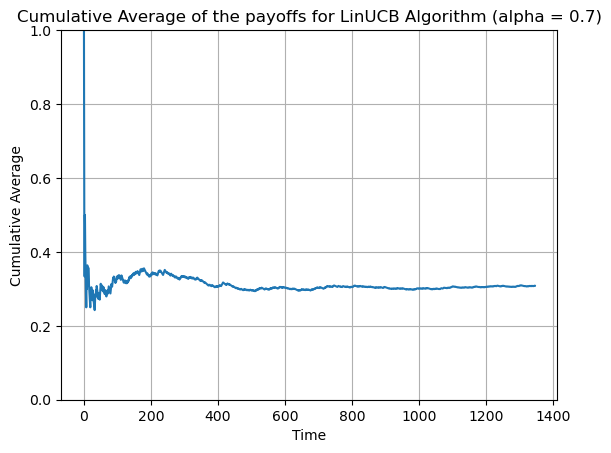

In [122]:
cumulative_average = np.cumsum(payoffs) / np.arange(1, len(payoffs)+1)

plt.plot(cumulative_average)
plt.xlabel("Time")
plt.ylabel("Cumulative Average")
plt.title("Cumulative Average of the payoffs for LinUCB Algorithm (alpha = 0.7)")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [137]:
alpha_values = np.arange(0, 1.45, 0.05)

In [138]:
for alpha_value in alpha_values:
    payoffs = policy_evaluator_disjoint_lin_ucb(dataframe, alpha_value)
    pd.DataFrame(payoffs).to_csv(f'linucb_{alpha_value}.csv')

for alpha_value in alpha_values:
    filename = f'linucb_{alpha_value}.csv'
    rewards = pd.read_csv(filename, index_col='Unnamed: 0')
    rewards = np.array(rewards['0'])
    cumulative_average = np.cumsum(rewards) / np.arange(1, len(rewards)+1)
    plt.plot(cumulative_average, label = f'alpha = {alpha_value}')

plt.xlabel("Time")
plt.ylabel("Cumulative Average")
plt.title("Cumulative Average of the payoffs for the LinUCB Algorithms")
plt.xlim(0,)
plt.ylim(0.25, 0.45)
plt.grid(True)
plt.legend(fontsize=7)
plt.show()